# Importing necessary libraries and dataset

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [32]:
data=pd.read_csv('Raw_Housing_Prices1.csv')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


# understanding dataset

In [33]:
data.isnull().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

# Data Exploration - Target Variable

In [35]:
data['Sale Price'].head(10)

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1230000.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: Sale Price, dtype: float64

Descriptive Statistics of 'sale price':

In [36]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

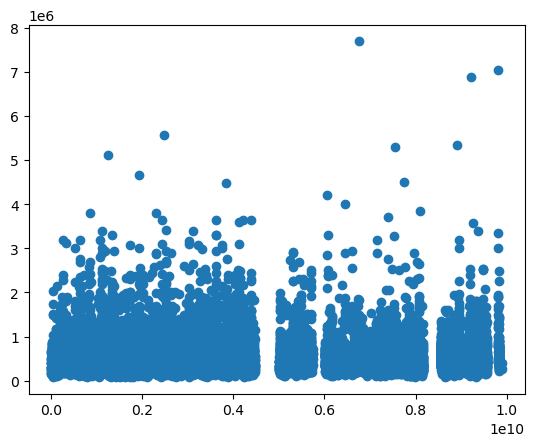

In [37]:
plt.scatter(x=data['ID'],y=data['Sale Price'])

<Axes: >

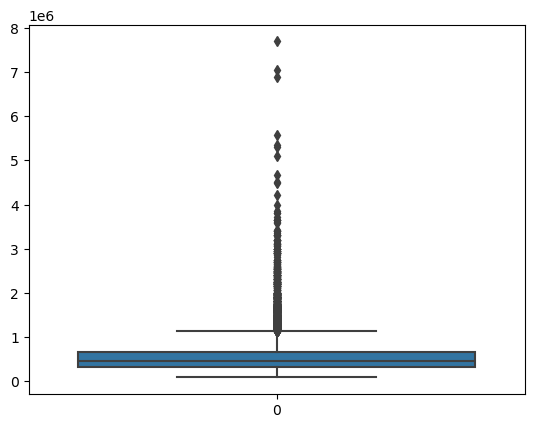

In [38]:
sns.boxplot(data['Sale Price'])

Identifing and Treating Outliers Mathematically:

In [39]:
#interquartile Range
Q3=data['Sale Price'].quantile(.75)
Q1=data['Sale Price'].quantile(.25)
IQR=Q3-Q1
IQR

323050.0

In [40]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
upper_limit,lower_limit

(1129575.0, -162625.0)

In [41]:
#for treating outliers by imputing
def limit(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value

In [42]:
data['Sale Price']=data['Sale Price'].apply(limit)

In [43]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

<Axes: >

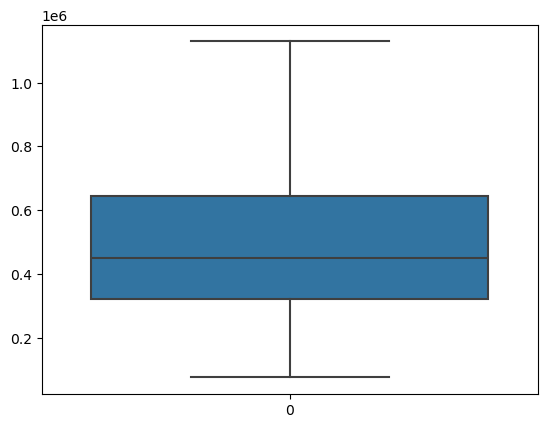

In [44]:
sns.boxplot(data['Sale Price'])

Treatment of Missing Values:

In [45]:
data.dropna(inplace=True,axis=0,subset=['Sale Price'])

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House     

Distribution:

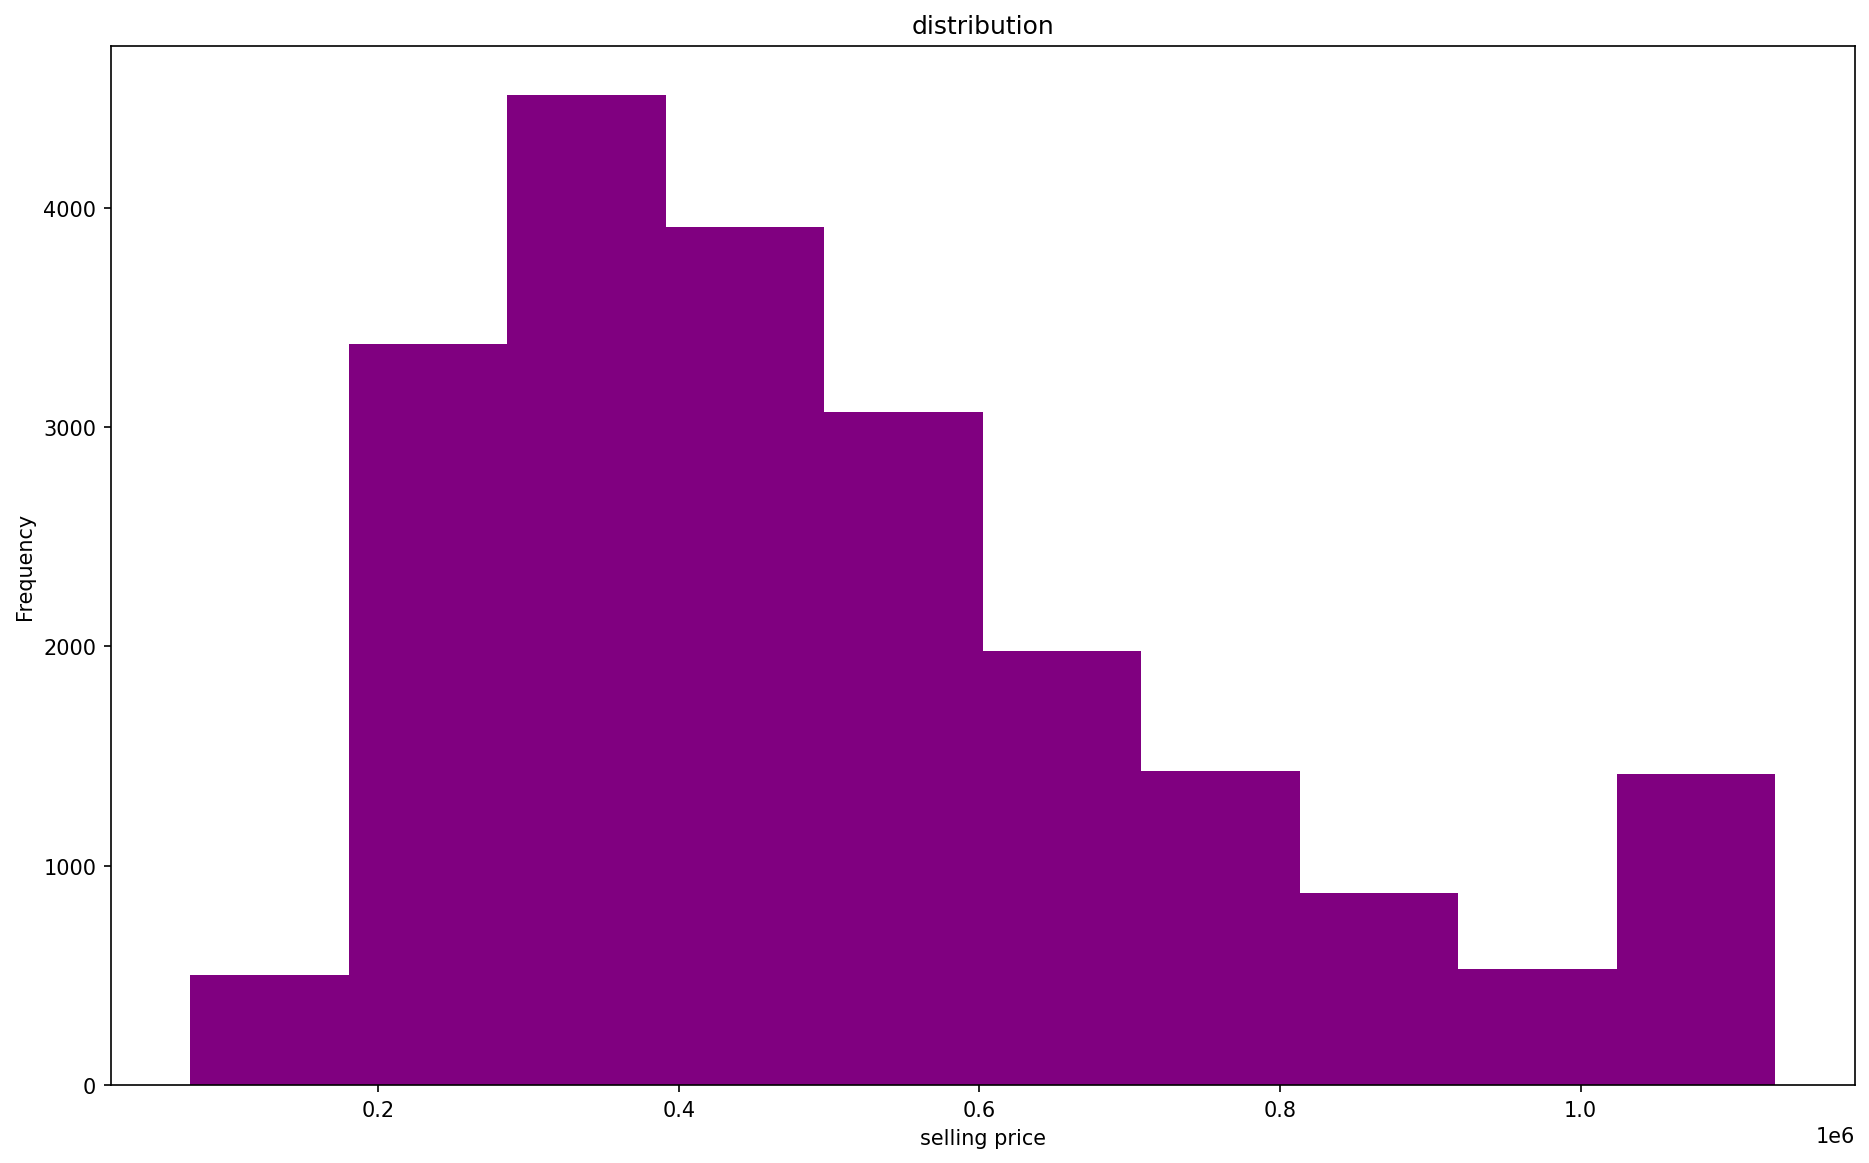

In [47]:
plt.figure(dpi=150,figsize=(15,9))
plt.hist(data['Sale Price'],bins=10,color='purple')
plt.ylabel('Frequency')
plt.xlabel('selling price')
plt.title('distribution')
plt.show()

# Data Exploration - Independent Numeric Variables

In [48]:
data.isnull().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       0
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19485
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

In [49]:
Numerical_Variables=['No of Bathrooms','Area of the House from Basement (in Sqft)','Flat Area (in Sqft)','Lot Area (in Sqft)','Latitude','Longitude','Living Area after Renovation (in Sqft)']

Treating Missing Values using Imputing:

In [50]:
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
data[Numerical_Variables]=imputer.fit_transform(data[Numerical_Variables])

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House     

In [52]:
data['Zipcode'].shape

(21609,)

In [53]:
column=data['Zipcode'].values.reshape(-1,1)

In [54]:
imputer=SimpleInputer(missing_values=np.nan,strategy='most_frequent')

In [55]:
data['Zipcode']=imputer.fit_transform(column)

# Data Exploration Categorical Variable

In [56]:
data.isnull().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       0
No of Bedrooms                                   0
No of Bathrooms                                  0
Flat Area (in Sqft)                              0
Lot Area (in Sqft)                               0
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19485
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        0
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          0
Latitude                                         0
Longitude                                        0
Living Area after Renovation (i

Imputing Missing Values

In [57]:
data['No of Times Visited']=data['No of Times Visited'].fillna('_None_')

In [58]:
data['No of Times Visited'].head()

0    _None_
1    _None_
2    _None_
3    _None_
4    _None_
Name: No of Times Visited, dtype: object

In [59]:
data['No of Times Visited'].unique()

array(['_None_', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [60]:

output_file_path =r"C:\Users\shiva\Downloads\M5T6_helper_text\housing_data.csv"

# Save the DataFrame to a CSV file
data.to_csv(output_file_path, index=False)

# Feature Engineering

In [30]:
data['Ever Renovated']=np.where(data['Renovated Year']==0,'No','Yes')

data['purchase year']=pd.DatetimeIndex(data['Date House was Sold']).year

data['years since renovation']=np.where(data['Ever Renovated']=='Yes',abs(data['purchase year']-data['Renovated Year']),0)

In [31]:
data.drop(columns=['Date House was Sold','ID','purchase year','Renovated Year'],inplace=True)

In [32]:
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,years since renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


Label Encoding:

In [33]:
mapping = {'None':0, 'Thrice':3, 'Four':4, 'Twice':2, 'Once':1}

In [34]:
data['No of Times Visited']=data['No of Times Visited'].map(mapping)

In [35]:
data['No of Times Visited'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   Waterfront View                            21609 non-null  object 
 7   No of Times Visited                        21609 non-null  int64  
 8   Condition of the House                     21609 non-null  object 
 9   Overall Grade                              21609 non-null  int64  
 10  Area of the House from Base

In [37]:
#binning 
mapping={'Excellent':'Excellent',
         'Good':'Good',
         'Fair':'Good',
         'Okay':'Okay',
         'Bad':'Okay'}
data['Condition of the House']=data['Condition of the House'].map(mapping)     

One Hot Encoding:

In [38]:
data=pd.get_dummies(data,columns=['Condition of the House'],drop_first=True)

In [39]:
data=pd.get_dummies(data,columns=['Ever Renovated'],drop_first=True)

In [40]:
data=pd.get_dummies(data,columns=['Waterfront View'],drop_first=True)

In [41]:
# grouping zipcode based on average sale price
zip_table=data.groupby('Zipcode').agg({'Sale Price':'mean'}).sort_values('Sale Price',ascending=True)

In [42]:
# creating bins based on average sale price
zip_table['zip_group']=pd.cut(zip_table['Sale Price'],bins=10,labels=['0','1','2','3','4','5','6','7','8','9'],include_lowest=True)
zip_table=zip_table.drop(columns='Sale Price')

In [43]:
# left joining
data=pd.merge(data,zip_table,left_on=['Zipcode'],how='left',right_index=True)

In [44]:
data=pd.get_dummies(data,columns=['zip_group'],drop_first=True)

In [45]:
boolean_columns=data.select_dtypes(include=bool).columns

In [46]:
data[boolean_columns]=data[boolean_columns].astype(int)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   No of Times Visited                        21609 non-null  int64  
 7   Overall Grade                              21609 non-null  int64  
 8   Area of the House from Basement (in Sqft)  21609 non-null  float64
 9   Basement Area (in Sqft)                    21609 non-null  int64  
 10  Age of House (in Years)    

Feature Transform:

In [49]:
def log_transform(sample_data):
    return np.log(sample_data)

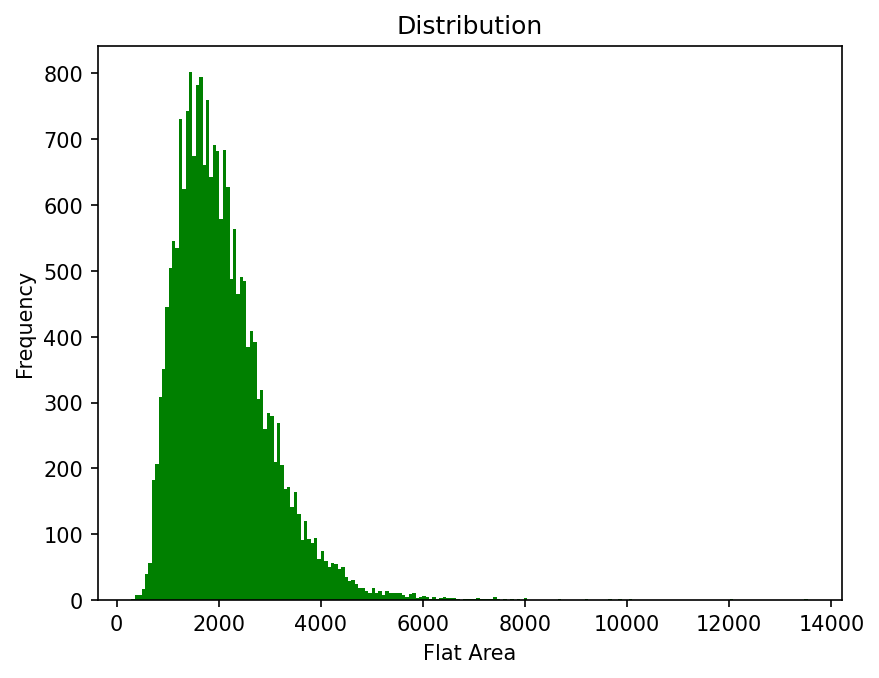

In [50]:
plt.figure(dpi=150)
plt.hist(data['Flat Area (in Sqft)'],color='green',bins=200)
plt.xlabel('Flat Area')
plt.ylabel('Frequency')
plt.title('Distribution')
plt.show()

In [51]:
data['Transformed Flat Area']=data['Flat Area (in Sqft)'].map(log_transform)
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,zip_group_1,zip_group_2,zip_group_3,zip_group_4,zip_group_5,zip_group_6,zip_group_7,zip_group_8,zip_group_9,Transformed Flat Area
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,7.073270
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,1,0,0,0,0,0,0,0,7.851661
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,1,0,0,0,0,0,0,0,6.646391
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,1,0,0,0,0,0,0,7.580700
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,1,0,0,0,0,0,7.426549


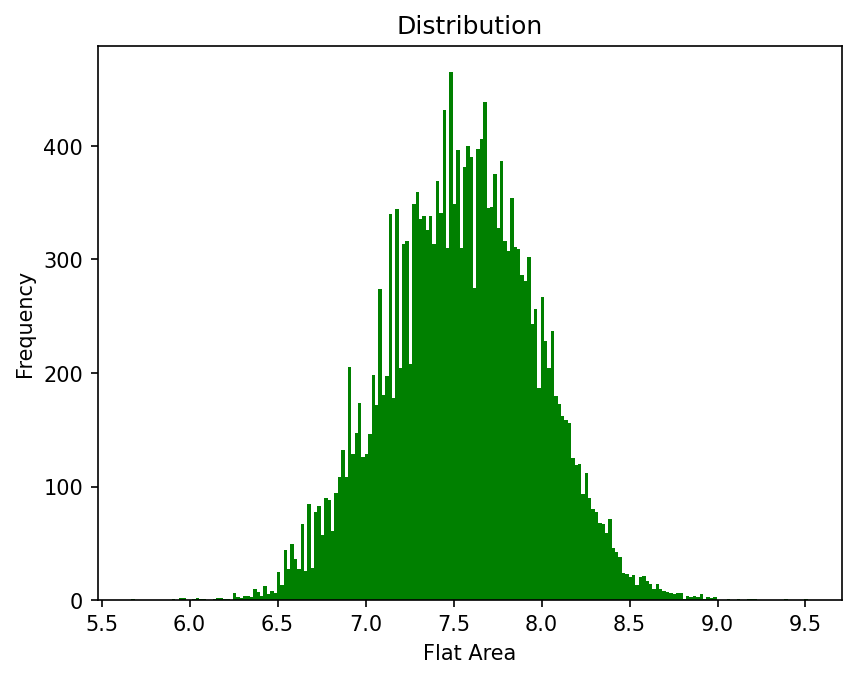

In [52]:
plt.figure(dpi=150)
plt.hist(data['Transformed Flat Area'],color='green',bins=200)
plt.xlabel('Flat Area')
plt.ylabel('Frequency')
plt.title('Distribution')
plt.show()

In [53]:
data['Transformed Area of the House from Basement']=data['Area of the House from Basement (in Sqft)'].map(log_transform)


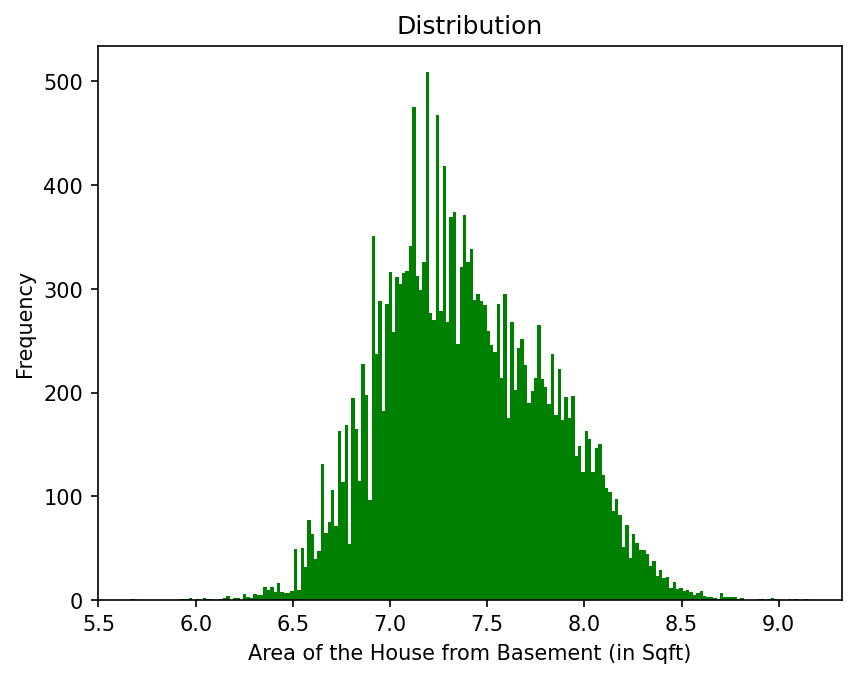

In [54]:
plt.figure(dpi=150)
plt.hist(data['Transformed Area of the House from Basement'],color='green',bins=200)
plt.xlabel('Area of the House from Basement (in Sqft)')
plt.ylabel('Frequency')
plt.title('Distribution')
plt.show()

In [55]:
data.drop(columns=['Flat Area (in Sqft)','Area of the House from Basement (in Sqft)'],inplace=True)

In [56]:
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Zipcode,...,zip_group_2,zip_group_3,zip_group_4,zip_group_5,zip_group_6,zip_group_7,zip_group_8,zip_group_9,Transformed Flat Area,Transformed Area of the House from Basement
0,221900.0,3,1.00,5650.0,1.0,0,7,0,63,98178.0,...,0,0,0,0,0,0,0,0,7.073270,7.073270
1,538000.0,3,2.25,7242.0,2.0,0,7,400,67,98125.0,...,1,0,0,0,0,0,0,0,7.851661,7.682482
2,180000.0,2,1.00,10000.0,1.0,0,6,0,85,98028.0,...,1,0,0,0,0,0,0,0,6.646391,6.646391
3,604000.0,4,3.00,5000.0,1.0,0,7,910,53,98136.0,...,0,1,0,0,0,0,0,0,7.580700,6.956545
4,510000.0,3,2.00,8080.0,1.0,0,8,0,31,98074.0,...,0,0,1,0,0,0,0,0,7.426549,7.426549


# EDA (EXPLORATORY DATA ANALYSIS)

In [57]:
data['Sale Price'].array

<NumpyExtensionArray>
[ 221900.0,  538000.0,  180000.0,  604000.0,  510000.0, 1129575.0,  257500.0,
  291850.0,  229500.0,  323000.0,
 ...
  507250.0,  429000.0,  610685.0, 1010000.0,  475000.0,  360000.0,  400000.0,
  402101.0,  400000.0,  325000.0]
Length: 21609, dtype: float64

In [58]:
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Zipcode,...,zip_group_2,zip_group_3,zip_group_4,zip_group_5,zip_group_6,zip_group_7,zip_group_8,zip_group_9,Transformed Flat Area,Transformed Area of the House from Basement
0,221900.0,3,1.00,5650.0,1.0,0,7,0,63,98178.0,...,0,0,0,0,0,0,0,0,7.073270,7.073270
1,538000.0,3,2.25,7242.0,2.0,0,7,400,67,98125.0,...,1,0,0,0,0,0,0,0,7.851661,7.682482
2,180000.0,2,1.00,10000.0,1.0,0,6,0,85,98028.0,...,1,0,0,0,0,0,0,0,6.646391,6.646391
3,604000.0,4,3.00,5000.0,1.0,0,7,910,53,98136.0,...,0,1,0,0,0,0,0,0,7.580700,6.956545
4,510000.0,3,2.00,8080.0,1.0,0,8,0,31,98074.0,...,0,0,1,0,0,0,0,0,7.426549,7.426549


In [59]:
data.tail()

,Sale Price,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Zipcode,...,zip_group_2,zip_group_3,zip_group_4,zip_group_5,zip_group_6,zip_group_7,zip_group_8,zip_group_9,Transformed Flat Area,Transformed Area of the House from Basement
21608,360000.0,3,2.50,1131.0,3.0,0,8,0,9,98103.0,...,0,1,0,0,0,0,0,0,7.333023,7.333023
21609,400000.0,4,2.50,5813.0,2.0,0,8,0,4,98146.0,...,0,0,0,0,0,0,0,0,7.745003,7.745003
21610,402101.0,2,0.75,1350.0,2.0,0,7,0,9,98144.0,...,0,1,0,0,0,0,0,0,6.927558,6.927558
21611,400000.0,3,2.50,2388.0,2.0,0,8,0,14,98027.0,...,0,0,1,0,0,0,0,0,7.377759,7.377759
21612,325000.0,2,0.75,1076.0,2.0,0,7,0,10,98144.0,...,0,1,0,0,0,0,0,0,6.927558,6.927558


In [60]:
data.shape

(21609, 30)

In [61]:
data.columns

Index(['Sale Price', 'No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors', 'No of Times Visited', 'Overall Grade',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Zipcode',
       'Latitude', 'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'years since renovation',
       'Condition of the House_Good', 'Condition of the House_Okay',
       'Ever Renovated_Yes', 'Waterfront View_Yes', 'zip_group_1',
       'zip_group_2', 'zip_group_3', 'zip_group_4', 'zip_group_5',
       'zip_group_6', 'zip_group_7', 'zip_group_8', 'zip_group_9',
       'Transformed Flat Area', 'Transformed Area of the House from Basement'],
      dtype='object')

In [62]:
#To get all the unique rows in a dataframe
print(data.nunique())

Sale Price                                     3444
No of Bedrooms                                   13
No of Bathrooms                                  30
Lot Area (in Sqft)                             9778
No of Floors                                      6
No of Times Visited                               5
Overall Grade                                    10
Basement Area (in Sqft)                         306
Age of House (in Years)                         116
Zipcode                                          70
Latitude                                       5033
Longitude                                       752
Living Area after Renovation (in Sqft)          777
Lot Area after Renovation (in Sqft)            8688
years since renovation                           74
Condition of the House_Good                       2
Condition of the House_Okay                       2
Ever Renovated_Yes                                2
Waterfront View_Yes                               2
zip_group_1 

In [63]:
#To check the null values in the dataframe
print(data.isnull().sum())

Sale Price                                     0
No of Bedrooms                                 0
No of Bathrooms                                0
Lot Area (in Sqft)                             0
No of Floors                                   0
No of Times Visited                            0
Overall Grade                                  0
Basement Area (in Sqft)                        0
Age of House (in Years)                        0
Zipcode                                        0
Latitude                                       0
Longitude                                      0
Living Area after Renovation (in Sqft)         0
Lot Area after Renovation (in Sqft)            0
years since renovation                         0
Condition of the House_Good                    0
Condition of the House_Okay                    0
Ever Renovated_Yes                             0
Waterfront View_Yes                            0
zip_group_1                                    0
zip_group_2         

In [64]:
data.describe()

,Sale Price,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Zipcode,...,zip_group_2,zip_group_3,zip_group_4,zip_group_5,zip_group_6,zip_group_7,zip_group_8,zip_group_9,Transformed Flat Area,Transformed Area of the House from Basement
count,2.160900e+04,21609.000000,21609.000000,2.160900e+04,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,...,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000
mean,5.116186e+05,3.370771,2.114709,1.510641e+04,1.494215,0.234347,7.623490,291.513490,46.999722,98077.940488,...,0.188625,0.149706,0.186681,0.043824,0.076450,0.012449,0.027720,0.002314,7.550349,7.394858
std,2.500620e+05,0.929916,0.770097,4.142353e+04,0.539909,0.766382,1.105519,442.570991,29.373317,53.506305,...,0.391220,0.356791,0.389665,0.204709,0.265722,0.110879,0.164173,0.048048,0.424733,0.427584
min,7.500000e+04,0.000000,0.000000,5.200000e+02,1.000000,0.000000,1.000000,0.000000,3.000000,98001.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.669881,5.669881
25%,3.219500e+05,3.000000,1.750000,5.040000e+03,1.000000,0.000000,7.000000,0.000000,21.000000,98033.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.265430,7.081709
50%,4.500000e+05,3.000000,2.250000,7.619000e+03,1.500000,0.000000,7.000000,0.000000,43.000000,98065.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.554859,7.352441
75%,6.450000e+05,4.000000,2.500000,1.068700e+04,2.000000,0.000000,8.000000,560.000000,67.000000,98118.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.843849,7.700748
max,1.129575e+06,33.000000,8.000000,1.651359e+06,3.500000,4.000000,10.000000,4820.000000,118.000000,98199.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.513404,9.149528


<Axes: >

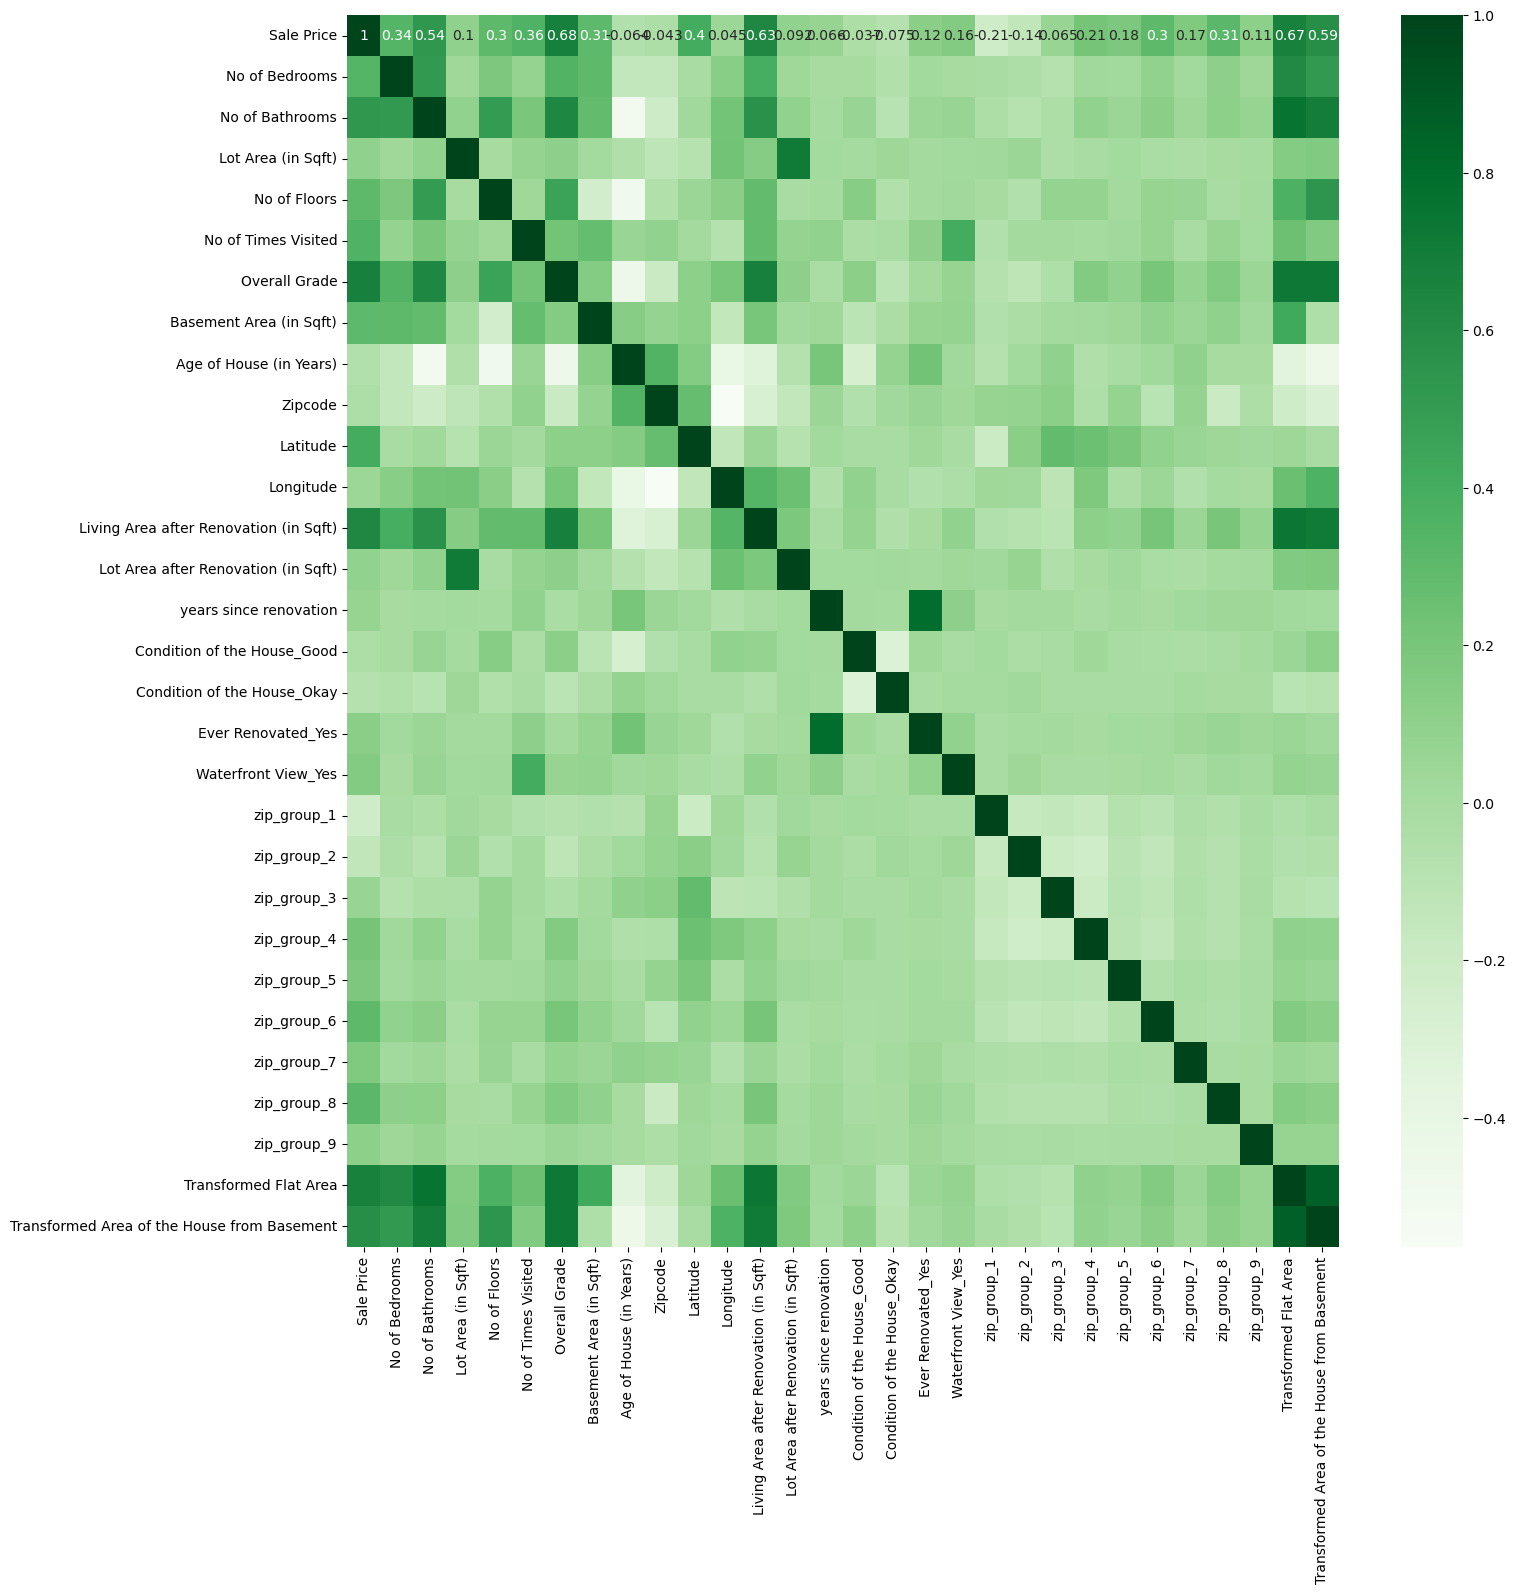

In [65]:
#Correlation
data.corr
plt.figure(figsize=(16,16))
sns.heatmap(data= data.corr(),annot=True,cmap='Greens')

# Scaling the Dataset

In [66]:
scaler=preprocessing.StandardScaler()
Y=data['Sale Price']
X=scaler.fit_transform(data.drop(columns='Sale Price'))

In [67]:
#converting into dataset
X=pd.DataFrame(data=X,columns=data.drop(columns=['Sale Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,...,zip_group_2,zip_group_3,zip_group_4,zip_group_5,zip_group_6,zip_group_7,zip_group_8,zip_group_9,Transformed Flat Area,Transformed Area of the House from Basement
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.658697,0.544734,1.870094,-0.352576,...,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-1.123272,-0.752122
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.245134,0.680915,0.879534,1.161645,...,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,0.709431,0.672689
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-0.658697,1.293731,-0.933379,1.283619,...,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-2.128348,-1.750497
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,1.397518,0.204281,1.085122,-0.283288,...,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,0.071459,-1.025114
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.658697,-0.544715,-0.073647,0.409587,...,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.291485,0.074118


In [68]:
X.shape[0]

21609

# checking and removing multicolinearity

In [69]:
k=X.corr()

In [70]:
k

,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,...,zip_group_2,zip_group_3,zip_group_4,zip_group_5,zip_group_6,zip_group_7,zip_group_8,zip_group_9,Transformed Flat Area,Transformed Area of the House from Basement
No of Bedrooms,1.000000,0.515813,0.031692,0.175536,0.079575,0.349223,0.303294,-0.154113,-0.152760,-0.008708,...,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694,0.620788,0.514917
No of Bathrooms,0.515813,1.000000,0.087732,0.500776,0.187791,0.635638,0.283798,-0.505954,-0.203951,0.024570,...,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871,0.761225,0.694711
Lot Area (in Sqft),0.031692,0.087732,1.000000,-0.005162,0.074668,0.102314,0.015252,-0.053119,-0.129551,-0.085719,...,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671,0.148739,0.162421
No of Floors,0.175536,0.500776,-0.005162,1.000000,0.029504,0.461368,-0.245572,-0.489244,-0.059222,0.049692,...,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868,0.367863,0.547594
No of Times Visited,0.079575,0.187791,0.074668,0.029504,1.000000,0.223661,0.276974,0.053395,0.084830,0.006162,...,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923,0.246770,0.158648
Overall Grade,0.349223,0.635638,0.102314,0.461368,0.223661,1.000000,0.145232,-0.456711,-0.185844,0.111226,...,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638,0.721705,0.722005
Basement Area (in Sqft),0.303294,0.283798,0.015252,-0.245572,0.276974,0.145232,1.000000,0.133072,0.074933,0.110451,...,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775,0.423228,-0.050613
Age of House (in Years),-0.154113,-0.505954,-0.053119,-0.489244,0.053395,-0.456711,0.133072,1.000000,0.346928,0.148083,...,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492,-0.349501,-0.450951
Zipcode,-0.152760,-0.203951,-0.129551,-0.059222,0.084830,-0.185844,0.074933,0.346928,1.000000,0.267022,...,0.075736,0.117422,-0.046753,0.079329,-0.095934,0.071470,-0.179854,-0.035049,-0.221244,-0.289472
Latitude,-0.008708,0.024570,-0.085719,0.049692,0.006162,0.111226,0.110451,0.148083,0.267022,1.000000,...,0.120400,0.283760,0.249304,0.190199,0.090785,0.056373,0.036085,0.022867,0.039450,-0.018495


In [71]:
z=[[str(i),str(j)] for i in k.columns for j in k.columns if(k.loc[i,j]>abs(0.5))&(i!=j)]
z,len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Transformed Flat Area'],
  ['No of Bedrooms', 'Transformed Area of the House from Basement'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['No of Bathrooms', 'Transformed Flat Area'],
  ['No of Bathrooms', 'Transformed Area of the House from Basement'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Transformed Area of the House from Basement'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Living Area after Renovation (in Sqft)'],
  ['Overall Grade', 'Transformed Flat Area'],
  ['Overall Grade', 'Transformed Area of the House from Basement'],
  ['Living Area after Renovation (in Sqft)', 'No of Bathrooms'],
  ['Living Area after Renovation (in Sqft)', 'Overall Grade'],
  ['Living Area after Re

# Treating multicolinearity with VIF¶

In [72]:
vif_data=X

In [73]:
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF,len(VIF)

(No of Bedrooms                                  1.784856
 No of Bathrooms                                 3.318393
 Lot Area (in Sqft)                              2.102452
 No of Floors                                    2.182560
 No of Times Visited                             1.469593
 Overall Grade                                   3.131893
 Basement Area (in Sqft)                         8.458791
 Age of House (in Years)                         2.527529
 Zipcode                                         1.810511
 Latitude                                        2.529168
 Longitude                                       2.040035
 Living Area after Renovation (in Sqft)          2.919483
 Lot Area after Renovation (in Sqft)             2.141843
 years since renovation                          2.779934
 Condition of the House_Good                     1.224122
 Condition of the House_Okay                     1.129405
 Ever Renovated_Yes                              2.896318
 Waterfront Vi

In [74]:
# function for removing variables with vif >0.5
def MC_remover(data):
    vif=pd.Series([variance_inflation_factor(data.values,i) for i in range(data.shape[1])],index=data.columns)
    if vif.max()>5:
        print(vif[vif==vif.max()].index[0],'has been removed')
        data=data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print('No multilinearity present anymore')
        return data

In [75]:
# using function to remove multicolinearity in data
for i  in range(7):
    vif_data=MC_remover(vif_data)
vif_data

Transformed Flat Area has been removed
No multilinearity present anymore
No multilinearity present anymore
No multilinearity present anymore
No multilinearity present anymore
No multilinearity present anymore
No multilinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,...,zip_group_1,zip_group_2,zip_group_3,zip_group_4,zip_group_5,zip_group_6,zip_group_7,zip_group_8,zip_group_9,Transformed Area of the House from Basement
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.658697,0.544734,1.870094,-0.352576,...,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.752122
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.245134,0.680915,0.879534,1.161645,...,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,0.672689
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-0.658697,1.293731,-0.933379,1.283619,...,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-1.750497
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,1.397518,0.204281,1.085122,-0.283288,...,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-1.025114
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.658697,-0.544715,-0.073647,0.409587,...,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,0.074118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,-0.398724,0.500326,-0.337386,2.789023,-0.30579,0.340581,-0.658697,-1.293712,0.468358,1.005026,...,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.144618
21605,0.676667,0.500326,-0.224356,0.936817,-0.30579,0.340581,-0.658697,-1.463938,1.272020,-0.356184,...,2.853220,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,0.818910
21606,-1.474115,-1.772168,-0.332099,0.936817,-0.30579,-0.563993,-0.658697,-1.293712,1.234640,0.247916,...,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-1.092909
21607,-0.398724,0.500326,-0.307041,0.936817,-0.30579,0.340581,-0.658697,-1.123485,-0.952068,-0.184409,...,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.039991


In [78]:
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF,len(VIF)

(No of Bedrooms                                 1.748102
 No of Bathrooms                                3.304997
 Lot Area (in Sqft)                             2.102437
 No of Floors                                   2.171742
 No of Times Visited                            1.444740
 Overall Grade                                  3.101355
 Basement Area (in Sqft)                        1.959493
 Age of House (in Years)                        2.525993
 Zipcode                                        1.808576
 Latitude                                       2.528986
 Longitude                                      2.039794
 Living Area after Renovation (in Sqft)         2.902825
 Lot Area after Renovation (in Sqft)            2.141833
 years since renovation                         2.779406
 Condition of the House_Good                    1.223531
 Condition of the House_Okay                    1.127041
 Ever Renovated_Yes                             2.896066
 Waterfront View_Yes           

# Training the Model

Creating Train and Test Set:

In [81]:
x=vif_data
y=data['Sale Price']
#splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

In [83]:
# Initialize the linear regression class instance
lr = LinearRegression()

# Train the model on the training data
lr.fit(x_train,y_train)

LinearRegression()

In [85]:
lr.coef_

array([ -6647.18460978,  16628.01402329,  16831.65113355,    540.43416178,
        26360.30993347,  57781.16281486,  25147.25510674,  31195.46398458,
         4078.1132024 ,  20706.18184195, -23687.96806592,  24742.45575726,
        -1998.4066195 , -10046.8277778 , -12905.26942175,  -7261.26637925,
        12921.27813604,  11573.28619543,  11333.57483826,  33787.54767828,
        63753.36992275,  81316.8312846 ,  50991.96058365,  74200.00295911,
        39960.86026925,  69377.34981827,  23432.13784269,  75516.29068827])

In [86]:
lr.intercept_

511957.6761348536

In [87]:
y_test

19829     610360.0
12530     740000.0
1613      537500.0
8688      520000.0
18206    1129575.0
           ...    
10799     411000.0
13199     835000.0
1763      597326.0
5751     1129575.0
11620    1129575.0
Name: Sale Price, Length: 6483, dtype: float64

In [90]:
#Generating Predictions over test set
predictions=lr.predict(x_test)
predictions

array([ 554703.77332564,  649751.26951836,  626601.5166064 , ...,
       1031215.63917751,  911485.42282908, 1177659.25257546])

In [91]:
#Evaluating predictions generated by our own model
lr.score(x_test,y_test)

0.8422762109288446